In [206]:
import pandas as pd
import re
import matplotlib.pyplot as plt

file_path = r"C:\Users\tpere\Documents\Python\LOSPIV\_chat.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

pattern = re.compile(r'\[(.*?)\] (.*?): (.*)')

matches = pattern.findall(data)

df = pd.DataFrame(matches, columns=['timestamp', 'nombre', 'mensaje'])

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M:%S', errors='coerce')

df.head()

,timestamp,nombre,mensaje
0,2017-09-21 20:40:14,LOSPIV,‎Los mensajes y las llamadas están cifrados de...
1,2017-09-21 20:40:14,Max Salvatore,‎Max Salvatore creó el grupo “Casa max”.
2,2017-09-21 20:40:14,LOSPIV,‎Max Salvatore te añadió.
3,2017-09-21 20:40:31,Tomi Perez,Hola
4,2017-09-21 20:40:55,Max Salvatore,Holis


In [207]:
df_2023 = df[df['timestamp'].dt.year == 2023]

df_2023.head()

,timestamp,nombre,mensaje
197036,2023-01-01 00:09:56,Pedro Harriague,Feliz año amigosss!!
197037,2023-01-01 00:10:18,Lasa,‎imagen omitida
197038,2023-01-01 00:19:10,Guillermo Biaus,Feliz año perritoz lindos
197039,2023-01-01 00:23:41,Chulo Guerrero,Feliz año amigos!!
197040,2023-01-01 01:30:01,Lasa,‎imagen omitida


In [208]:
mensajes = df_2023.groupby('nombre').count()
mensajes_ordenados = mensajes.sort_values(by='mensaje', ascending=False)

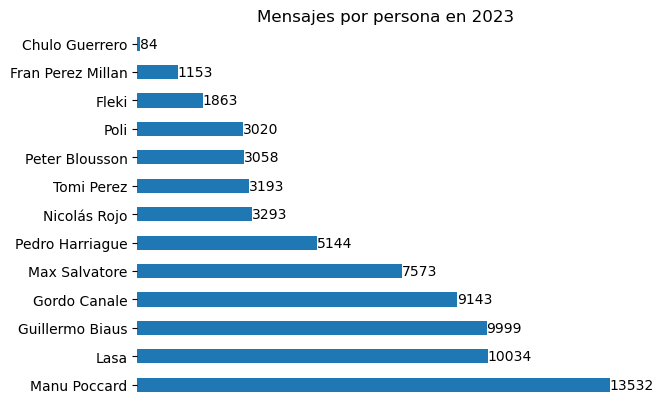

In [176]:
ax = mensajes_ordenados.plot(kind='barh', y='mensaje', legend=False)

for index, value in enumerate(mensajes_ordenados['mensaje']):
    ax.text(value, index, str(value), ha='left', va='center')

ax.set_xticks([])
ax.set_ylabel('')
plt.box(False)
plt.title('Mensajes por persona en 2023')

plt.show()

In [219]:
from collections import Counter

# Concatenar todos los mensajes en un solo string
msjs = df_2023['mensaje'].str.cat(sep=' ')

# Encontrar todas las palabras en minúsculas
palabras = re.findall(r'\b\w+\b', msjs.lower())  

# Contar la frecuencia de cada palabra
palabras_contadas = Counter(palabras)

# Crear un DataFrame con la cuenta de palabras
df_palabras_contadas = pd.DataFrame(palabras_contadas.items(), columns=['palabra', 'cuenta'])

# Ordenar el DataFrame por la frecuencia de palabras de mayor a menor
df_palabras = df_palabras_contadas.sort_values(by='cuenta', ascending=False)

# Lista de palabras a omitir
palabras_a_omitir = ['uno','una','como','las','esta','los', 'pero', 'para', 'que', 'omitido', 'omitida', 'imagen', 'sticker', 'audio', 'video', 'a', 'ante', 'bajo', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras', 'durante', 'mediante', 'versus', 'vía']

# Filtrar las palabras a omitir
df_resultado = df_palabras[~df_palabras['palabra'].isin(palabras_a_omitir)]

# Filtrar palabras de longitud mayor o igual a 3
df_resultado = df_resultado[df_resultado['palabra'].apply(lambda x: len(x) >= 3)]

# Seleccionar las primeras 15 palabras más frecuentes
top_palabras = df_resultado.head(15)

# Mostrar el resultado
print(top_palabras)


      palabra  cuenta
167     amigo     940
357       del     906
238       mas     879
254     igual     844
80        ahi     737
9         hay     702
113      todo     594
245       hoy     592
218       nos     564
95        fue     542
244  jajajaja     542
147       toy     538
158      este     534
333       eso     533
70        era     524


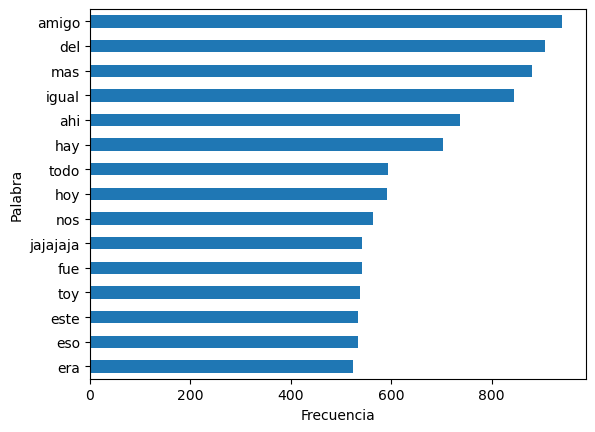

In [218]:
top_palabras.sort_values(by='cuenta').plot(kind='barh', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

palabritas = top_palabras.sort_values(by='cuenta')['palabra']
plt.yticks(range(len(top_palabras)), palabritas)

plt.show()